In [65]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

In [2]:
df = pd.read_csv("dati/square451Hz.dat", delimiter=r"  ", names=["k","V(k)", "Re(k)", "Im(k)", "Abs(k)"], skiprows=2)

/home/rosso/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


Text(0, 0.5, '|T|')

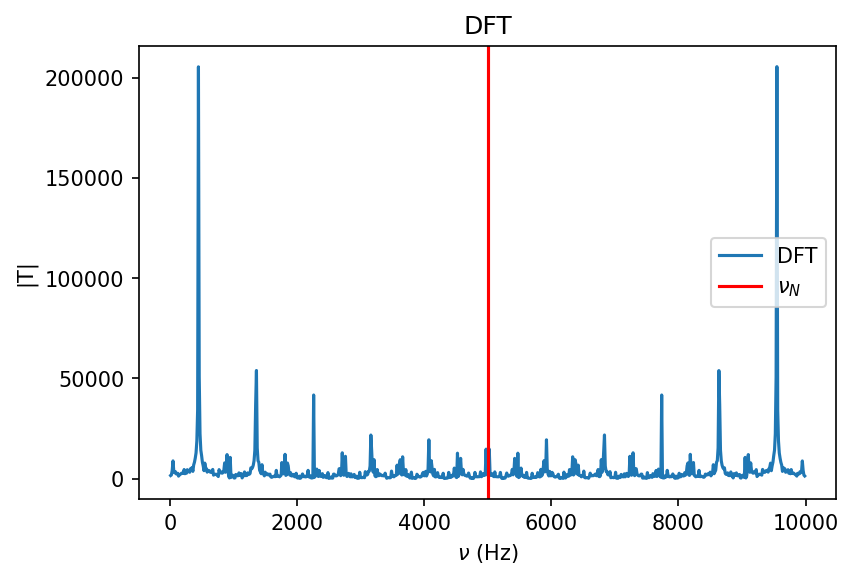

In [35]:
a, b = 1, 800
plt.plot(df["k"][a:b]*12.5, df["Abs(k)"][a:b], label="DFT")
plt.xlabel("$\\nu$ (Hz)")
plt.axvline(5000, label="$\\nu_N$", c="r")
plt.legend()
plt.title("DFT")
plt.ylabel("|T|")

In [160]:
AbsT_1 = np.zeros(800)
AbsT_2 = np.zeros(800)
S_k_1 = np.zeros((800))
S_k_2 = np.zeros((800))
for i in range(10):
    AbsT_1 += pd.read_csv("dati/rumore1_{}.dat".format(str(i+1)), delimiter=r"  ", names=["k","V(k)", "Re(k)", "Im(k)", "Abs(k)"], skiprows=2, )["Abs(k)"]
    AbsT_2 += pd.read_csv("dati/rumore2_{}.dat".format(str(i+1)), delimiter=r"  ", names=["k","V(k)", "Re(k)", "Im(k)", "Abs(k)"], skiprows=2, )["Abs(k)"]
    S_k_1 += .1*(pd.read_csv("dati/rumore1_{}.dat".format(str(i+1)), delimiter=r"  ", names=["k","V(k)", "Re(k)", "Im(k)", "Abs(k)"], skiprows=2, )["Abs(k)"])**2
    S_k_2 += .1*(pd.read_csv("dati/rumore2_{}.dat".format(str(i+1)), delimiter=r"  ", names=["k","V(k)", "Re(k)", "Im(k)", "Abs(k)"], skiprows=2, )["Abs(k)"])**2
S_k_1 = np.sqrt(S_k_1)
S_k_2 = np.sqrt(S_k_2)

Text(0.5, 0, '$\\nu$ (Hz)')

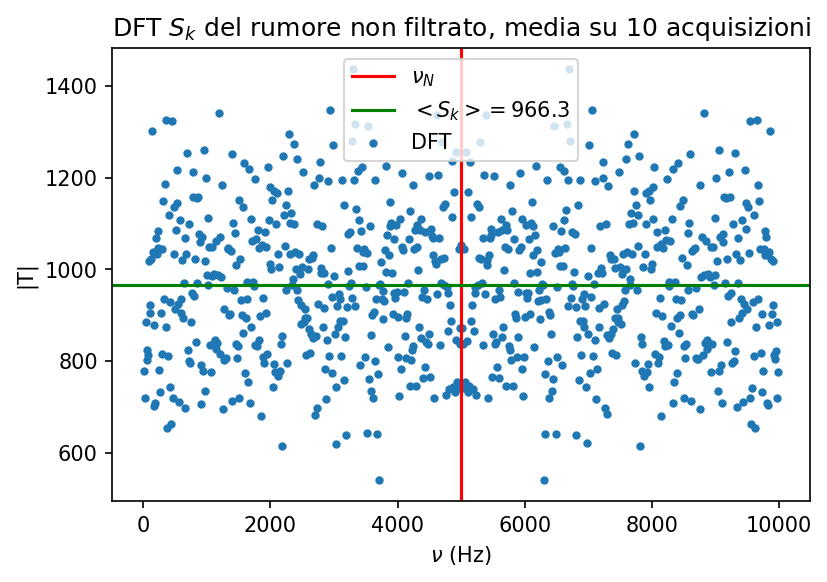

In [161]:
a, b = 1, 800
plt.scatter(df["k"][a:b]*12.5, S_k_1[a:b], marker=".", label="DFT")
plt.axvline(5000, label="$\\nu_N$", c="r")
plt.axhline(S_k_1[a:b].mean(), c="green", label="$<S_k>={}$".format(S_k_1[a:b].mean().round(1)))
plt.legend()
plt.title("DFT $S_k$ del rumore non filtrato, media su 10 acquisizioni")
plt.ylabel("|T|")
plt.xlabel("$\\nu$ (Hz)")



Text(0.5, 0, '$\\nu$ (Hz)')

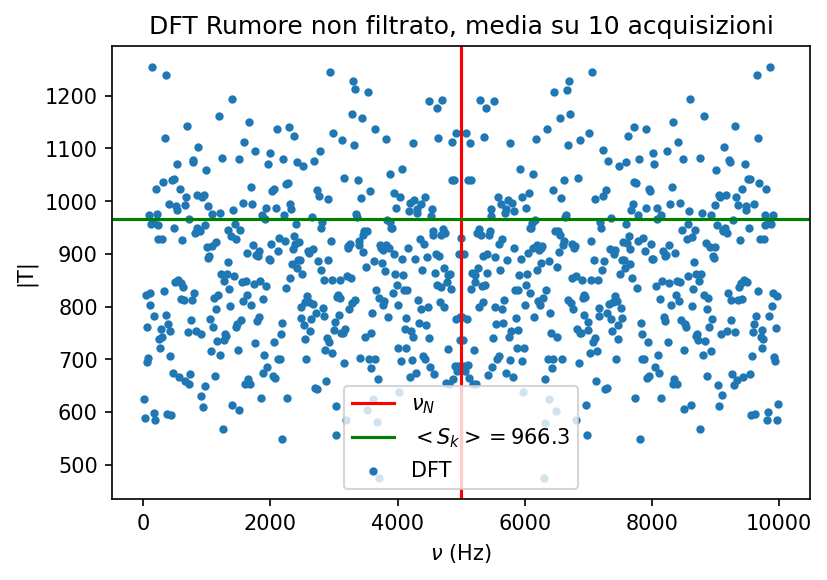

In [162]:
a, b = 1, 800
plt.scatter(df["k"][a:b]*12.5, AbsT_1[a:b]/10, marker=".", label="DFT")
plt.axvline(5000, label="$\\nu_N$", c="r")
plt.axhline(S_k_1[a:b].mean(), c="green", label="$<S_k>={}$".format(S_k_1[a:b].mean().round(1)))
plt.legend()
plt.title("DFT Rumore non filtrato, media su 10 acquisizioni")
plt.ylabel("|T|")
plt.xlabel("$\\nu$ (Hz)")



Text(0.5, 0, '$\\nu$ (Hz)')

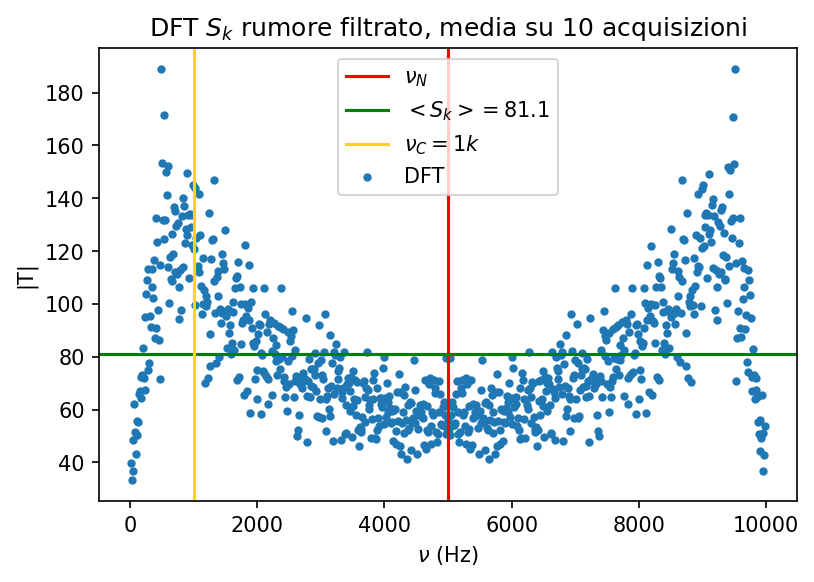

In [173]:
a, b = 1, 800
plt.scatter(df["k"][a:b]*12.5, S_k_2[a:b], marker=".", label="DFT")
plt.axvline(5000, label="$\\nu_N$", c="r")
plt.axhline(S_k_2[a:b].mean(), c="green", label="$<S_k>={}$".format(S_k_2[a:b].mean().round(1)))
plt.axvline(1000, label="$\\nu_C=1k$", color="gold")
plt.legend()
plt.title("DFT $S_k$ rumore filtrato, media su 10 acquisizioni")
plt.ylabel("|T|")
plt.xlabel("$\\nu$ (Hz)")


Text(0.5, 0, '$\\nu$ (Hz)')

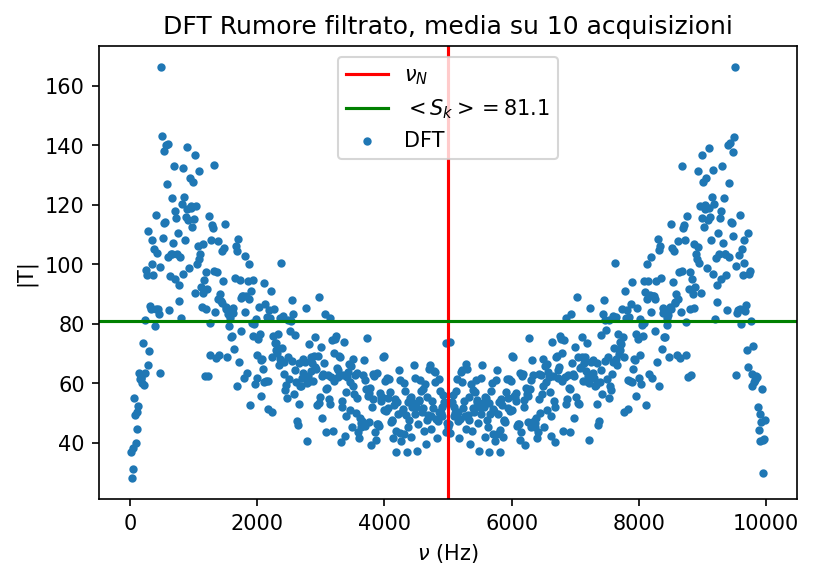

In [168]:
a, b = 1, 800
plt.scatter(df["k"][a:b]*12.5, AbsT_2[a:b]/10, marker=".", label="DFT")
plt.axvline(5000, label="$\\nu_N$", c="r")
plt.axhline(S_k_2[a:b].mean(), c="green", label="$<S_k>={}$".format(S_k_2[a:b].mean().round(1)))
plt.legend()
plt.title("DFT Rumore filtrato, media su 10 acquisizioni")
plt.ylabel("|T|")
plt.xlabel("$\\nu$ (Hz)")


/home/rosso/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


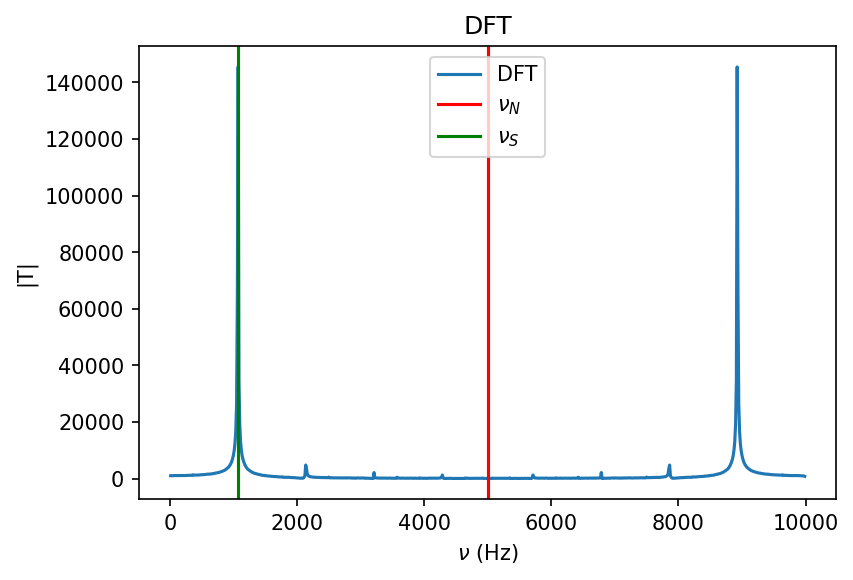

In [69]:
df_x = pd.read_csv("dati/sin1070Hz.dat", delimiter=r"  ", names=["k","V(k)", "Re(k)", "Im(k)", "Abs(k)"], skiprows=2)

fig = plt.figure()
ay = fig.add_subplot(1, 1, 1)

a, b = 1, 800
plt.plot(df_x["k"][a:b]*12.5, df_x["Abs(k)"][a:b], label="DFT")
plt.xlabel("$\\nu$ (Hz)")
plt.axvline(5000, label="$\\nu_N$", c="r")
plt.axvline(1075, label="$\\nu_S$", c="g")
plt.legend()
plt.title("DFT")
plt.ylabel("|T|")
#plt.xlim(1040,1100)
plt.savefig("Sin1070.png", dpi=300)

/home/rosso/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


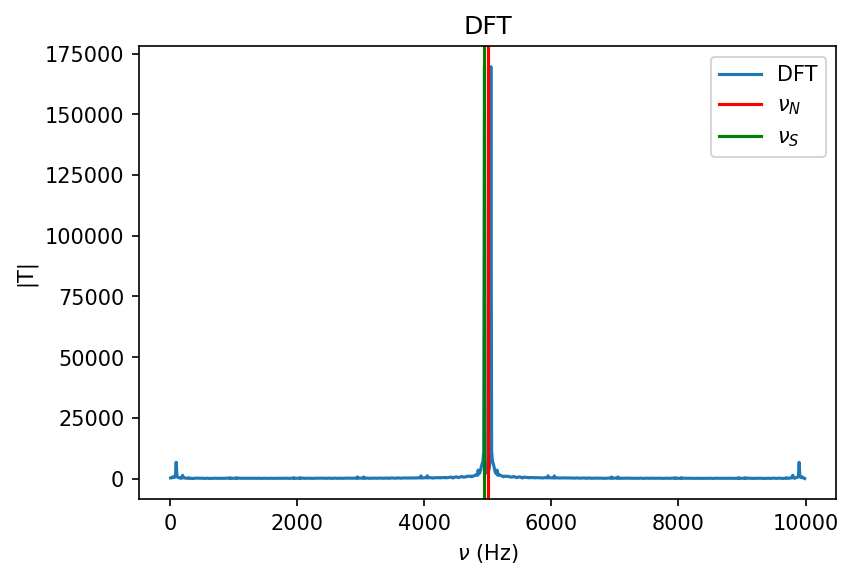

In [94]:
df_x = pd.read_csv("dati/sin5050Hz.dat", delimiter=r"  ", names=["k","V(k)", "Re(k)", "Im(k)", "Abs(k)"], skiprows=2)
a, b = 1, 800
plt.plot(df_x["k"][a:b]*12.5, df_x["Abs(k)"][a:b], label="DFT")
plt.xlabel("$\\nu$ (Hz)")
plt.axvline(5000, label="$\\nu_N$", c="r")
plt.axvline(4950, label="$\\nu_S$", c="g")
plt.legend()
plt.title("DFT")
plt.ylabel("|T|")
plt.savefig("Sin4950.png")

/home/rosso/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


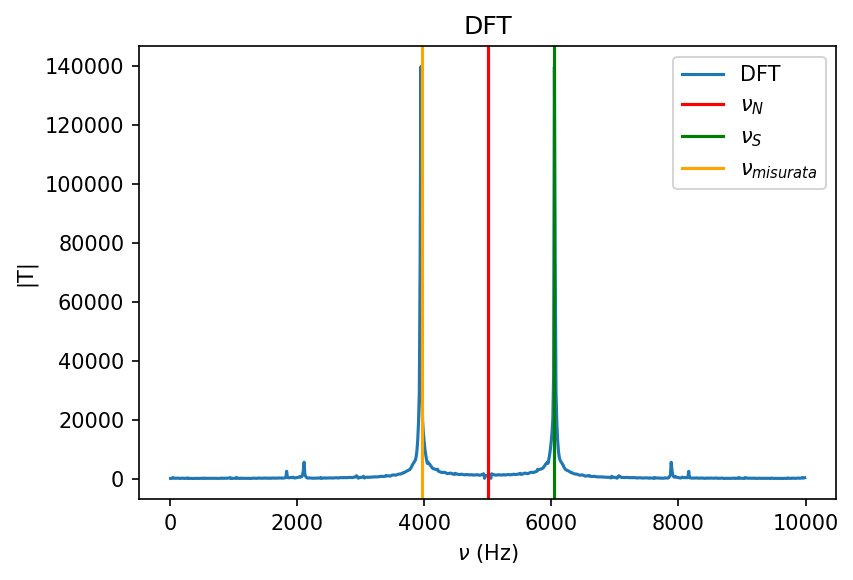

In [104]:
df_x = pd.read_csv("dati/sin6040Hz.dat", delimiter=r"  ", names=["k","V(k)", "Re(k)", "Im(k)", "Abs(k)"], skiprows=2)
a, b = 1, 800
plt.plot(df_x["k"][a:b]*12.5, df_x["Abs(k)"][a:b], label="DFT")
plt.xlabel("$\\nu$ (Hz)")
plt.axvline(5000, label="$\\nu_N$", c="r")
plt.axvline(6040, label="$\\nu_S$", c="g")
plt.axvline(3960, label="$\\nu_{misurata}$", c="orange")
plt.legend()
plt.title("DFT")
plt.ylabel("|T|")
plt.savefig("Sin6040.png")

/home/rosso/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


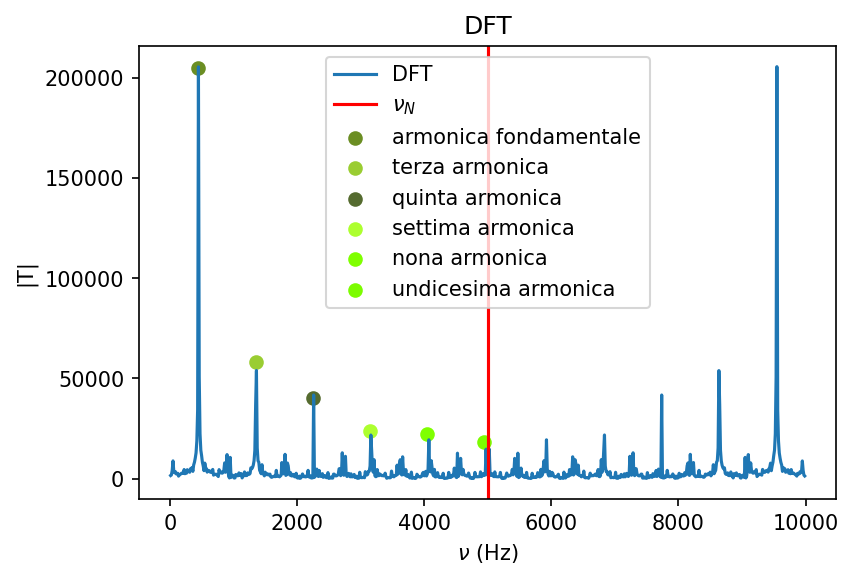

In [134]:
df_x = pd.read_csv("dati/square451Hz.dat", delimiter=r"  ", names=["k","V(k)", "Re(k)", "Im(k)", "Abs(k)"], skiprows=2)
a, b = 1, 800
plt.plot(df_x["k"][a:b]*12.5, df_x["Abs(k)"][a:b], label="DFT")

plt.scatter(450, 205000,c="olivedrab", label="armonica fondamentale")
plt.scatter(450*3, 205000/3-10000,c="yellowgreen", label="terza armonica")
plt.scatter(450*5, 200000/5,c="darkolivegreen", label="quinta armonica")
plt.scatter(450*7, 200000/7-5000,c="greenyellow", label="settima armonica")
plt.scatter(450*9, 200000/9,c="chartreuse", label="nona armonica")
plt.scatter(450*11, 200000/11,c="lawngreen", label="undicesima armonica")

plt.xlabel("$\\nu$ (Hz)")
plt.axvline(5000, label="$\\nu_N$", c="r")
plt.legend()
plt.title("DFT")
plt.ylabel("|T|")
plt.savefig("Square451.png")

In [108]:
451*0.03

13.53